# Graded Challange 1

i. Introduction

Hi, my name Fauzan Nurachman a.k.a Ojan from class Full Time Data Science Batch 003

## Description

### Objective

On this occasion, I will make a deaths comparison data in all cities in Italy for 1 month on January 2022. 

### Problem Statement

By we know the deaths comparation, we can compare top 5 cities the most deaths on January 2022.

## Working Area

ii. Importing Library

For the first time, we have to import numpy and pandas library for arithmetic processing and manipulating the data that we are going to do.

In [1]:
import numpy as np
import pandas as pd

iii. Data Loading

After we imported the library, we're looking for the data we need in the Big Query Google Cloud Platform. Then we look for the dataset from the database available in bigquery-public-data.covid19_jhu_csse. After that we take the dataset we need with a query like this:

SELECT province_state, country_region, date, confirmed, deaths, recovered, active
FROM `bigquery-public-data.covid19_jhu_csse.summary`
WHERE country_region = "Italy" 
  AND date between "2022-01-01" AND "2022-01-31"
ORDER BY date

From this data, we filter the columns what we want with the goal to decrease the data that we take. We will take data province_state, country_region, date, confirmed, deaths, recovered, active.

After that, we import the data into .csv file by downloading on Google Cloud Platform to this notebook. After that we assign the variable to the DataFrame or df to continue processing the data.

In [2]:
df=pd.read_csv('/Users/macbook/Documents/GC1/h8dsft_P0GC1_Fauzan Nurachman.csv')
df

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Abruzzo,Italy,2022-01-01,110499,2640,NaN,NaN
1,Basilicata,Italy,2022-01-01,37137,635,NaN,NaN
2,Calabria,Italy,2022-01-01,112976,1625,NaN,NaN
3,Campania,Italy,2022-01-01,597150,8471,NaN,NaN
4,Emilia-Romagna,Italy,2022-01-01,549175,14231,NaN,NaN
...,...,...,...,...,...,...,...
646,Sicilia,Italy,2022-01-31,623669,8527,NaN,NaN
647,Toscana,Italy,2022-01-31,739306,8263,NaN,NaN
648,Umbria,Italy,2022-01-31,155072,1623,NaN,NaN
649,Valle d'Aosta,Italy,2022-01-31,29117,507,NaN,NaN


After that, we want to see how many rows and columns are in the data by using df.shape . In that DataFrame, there are 651 rows and 7 columns.

In [3]:
df.shape

(651, 7)

After that, we want to know the data type on the column we retrieved with the df.info() function. The point is to find out what data type is in each column and the number of Non-Null.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  651 non-null    object 
 1   country_region  651 non-null    object 
 2   date            651 non-null    object 
 3   confirmed       651 non-null    int64  
 4   deaths          651 non-null    int64  
 5   recovered       0 non-null      float64
 6   active          0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 35.7+ KB


After that, we want to see the unique data that resides in each column with the df.nunique() function. The point is to find out the unique code in each column.

In [5]:
df.nunique()

province_state     21
country_region      1
date               31
confirmed         649
deaths            585
recovered           0
active              0
dtype: int64

Since we're going to be using date data, we're going to change the date data type that was an object (STR) to datetime by using the pandas pd.to_datetime() function. In order to change the date data type for later when processing time range data, to make it easy, we change it to datetime.

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province_state  651 non-null    object        
 1   country_region  651 non-null    object        
 2   date            651 non-null    datetime64[ns]
 3   confirmed       651 non-null    int64         
 4   deaths          651 non-null    int64         
 5   recovered       0 non-null      float64       
 6   active          0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 35.7+ KB


iv. Data Cleaning

In this process, we'll get rid of columns that have nothing to do with the data that we'll later do. We don't use confirmed, recovered, and active columns because they are irrelevant to what we want to look for.

We'll use the df.drop() function. The function is used to eliminate or output columns that we do not want.

In [7]:
df.drop(['confirmed', 'recovered', 'active'], axis=1, inplace=True)
df

,province_state,country_region,date,deaths
0,Abruzzo,Italy,2022-01-01,2640
1,Basilicata,Italy,2022-01-01,635
2,Calabria,Italy,2022-01-01,1625
3,Campania,Italy,2022-01-01,8471
4,Emilia-Romagna,Italy,2022-01-01,14231
...,...,...,...,...
646,Sicilia,Italy,2022-01-31,8527
647,Toscana,Italy,2022-01-31,8263
648,Umbria,Italy,2022-01-31,1623
649,Valle d'Aosta,Italy,2022-01-31,507


Because there is no missing data in the deaths column, then we immediately proceed to retrieve the date we need. The dates we need are January 1, 2022 and January 31, 2022. Why is the date because to get the result of death in the month we have to subtract the date at the end and at the beginning of the month. We also change for the alias because to get the result we want.

In [8]:
df1 = df[((df['date'] == '2022-01-31') | (df['date'] == '2022-01-01'))]
df1

,province_state,country_region,date,deaths
0,Abruzzo,Italy,2022-01-01,2640
1,Basilicata,Italy,2022-01-01,635
2,Calabria,Italy,2022-01-01,1625
3,Campania,Italy,2022-01-01,8471
4,Emilia-Romagna,Italy,2022-01-01,14231
5,Friuli Venezia Giulia,Italy,2022-01-01,4225
6,Lazio,Italy,2022-01-01,9275
7,Liguria,Italy,2022-01-01,4587
8,Lombardia,Italy,2022-01-01,35095
9,Marche,Italy,2022-01-01,3249


Then we break it into 2 tables to make it easier in the exploration data. Break down the table we use the new variable. The variables are df2 and df3.

In [9]:
df2 = df[(df['date'] == '2022-01-01')]
df2

,province_state,country_region,date,deaths
0,Abruzzo,Italy,2022-01-01,2640
1,Basilicata,Italy,2022-01-01,635
2,Calabria,Italy,2022-01-01,1625
3,Campania,Italy,2022-01-01,8471
4,Emilia-Romagna,Italy,2022-01-01,14231
5,Friuli Venezia Giulia,Italy,2022-01-01,4225
6,Lazio,Italy,2022-01-01,9275
7,Liguria,Italy,2022-01-01,4587
8,Lombardia,Italy,2022-01-01,35095
9,Marche,Italy,2022-01-01,3249


In [10]:
df3 = df[(df['date'] == '2022-01-31')]
df3

,province_state,country_region,date,deaths
630,Abruzzo,Italy,2022-01-31,2811
631,Basilicata,Italy,2022-01-31,681
632,Calabria,Italy,2022-01-31,1887
633,Campania,Italy,2022-01-31,9139
634,Emilia-Romagna,Italy,2022-01-31,15088
635,Friuli Venezia Giulia,Italy,2022-01-31,4487
636,Lazio,Italy,2022-01-31,9823
637,Liguria,Italy,2022-01-31,4873
638,Lombardia,Italy,2022-01-31,37184
639,Marche,Italy,2022-01-31,3418


Then we combine those 2 tables into a new variable with the name df4. We use these variables for later data exploration. We use the df2.merge() function.

In [11]:
df4 = df2.merge(df3, on='province_state', how='inner')
df4

,province_state,country_region_x,date_x,deaths_x,country_region_y,date_y,deaths_y
0,Abruzzo,Italy,2022-01-01,2640,Italy,2022-01-31,2811
1,Basilicata,Italy,2022-01-01,635,Italy,2022-01-31,681
2,Calabria,Italy,2022-01-01,1625,Italy,2022-01-31,1887
3,Campania,Italy,2022-01-01,8471,Italy,2022-01-31,9139
4,Emilia-Romagna,Italy,2022-01-01,14231,Italy,2022-01-31,15088
5,Friuli Venezia Giulia,Italy,2022-01-01,4225,Italy,2022-01-31,4487
6,Lazio,Italy,2022-01-01,9275,Italy,2022-01-31,9823
7,Liguria,Italy,2022-01-01,4587,Italy,2022-01-31,4873
8,Lombardia,Italy,2022-01-01,35095,Italy,2022-01-31,37184
9,Marche,Italy,2022-01-01,3249,Italy,2022-01-31,3418


Then we drop the table back to the table we didn't use. The columns are country_region_y, date_x, and date_y. We use the df4.drop() function.

In [12]:
df4.drop(['country_region_y', 'date_x', 'date_y'], axis=1, inplace=True)
df4

,province_state,country_region_x,deaths_x,deaths_y
0,Abruzzo,Italy,2640,2811
1,Basilicata,Italy,635,681
2,Calabria,Italy,1625,1887
3,Campania,Italy,8471,9139
4,Emilia-Romagna,Italy,14231,15088
5,Friuli Venezia Giulia,Italy,4225,4487
6,Lazio,Italy,9275,9823
7,Liguria,Italy,4587,4873
8,Lombardia,Italy,35095,37184
9,Marche,Italy,3249,3418


Then we rename the column name so that we make it easier to search for columns, rename the column using df4.rename().

In [13]:
df4.rename(columns={'province_state':'City', 'country_region_x':'Country', 'deaths_x':'2022-01-01', 'deaths_y':'2022-01-31'}, inplace=True)
df4

,City,Country,2022-01-01,2022-01-31
0,Abruzzo,Italy,2640,2811
1,Basilicata,Italy,635,681
2,Calabria,Italy,1625,1887
3,Campania,Italy,8471,9139
4,Emilia-Romagna,Italy,14231,15088
5,Friuli Venezia Giulia,Italy,4225,4487
6,Lazio,Italy,9275,9823
7,Liguria,Italy,4587,4873
8,Lombardia,Italy,35095,37184
9,Marche,Italy,3249,3418


v. Data Exploration

After we get the data that is enchanted, either in the form of a dataset or the desired column, we will process the data. We're going to make reductions to get the total number of deaths in January. We'll create a new column with a subtraction function from an existing column. We use the function df[] = df[] - df[].

In [14]:
df4['Total_Deaths'] = df4['2022-01-31'] - df4['2022-01-01']
df4

,City,Country,2022-01-01,2022-01-31,Total_Deaths
0,Abruzzo,Italy,2640,2811,171
1,Basilicata,Italy,635,681,46
2,Calabria,Italy,1625,1887,262
3,Campania,Italy,8471,9139,668
4,Emilia-Romagna,Italy,14231,15088,857
5,Friuli Venezia Giulia,Italy,4225,4487,262
6,Lazio,Italy,9275,9823,548
7,Liguria,Italy,4587,4873,286
8,Lombardia,Italy,35095,37184,2089
9,Marche,Italy,3249,3418,169


Since we have already got the Total_Deaths data, we will remove the unused columns namely 2022-01-31 and 2022-01-01. Removal of columns using df4.drop() .

In [15]:
df4.drop(['2022-01-01', '2022-01-31'], axis=1, inplace=True)
df4

,City,Country,Total_Deaths
0,Abruzzo,Italy,171
1,Basilicata,Italy,46
2,Calabria,Italy,262
3,Campania,Italy,668
4,Emilia-Romagna,Italy,857
5,Friuli Venezia Giulia,Italy,262
6,Lazio,Italy,548
7,Liguria,Italy,286
8,Lombardia,Italy,2089
9,Marche,Italy,169


After that we will look for an average death rate in January in Italy. It's just that we want to know it. To find the average we use the df4.mean() function.

In [16]:
mean_total_deaths = df4.mean(axis = 0)
mean_total_deaths

/var/folders/88/c6n5gxvx6xzb__lg7t5j7y780000gn/T/ipykernel_1785/140833152.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_total_deaths = df4.mean(axis = 0)


Total_Deaths    427.857143
dtype: float64

Then we create a new variable to get rounded. We use the round() function .

In [17]:
mean_total_deaths_2 = round(427.857143, 0)
mean_total_deaths_2

428.0

Then we continue for our goal which is to find the highest value, we sort according to the largest value so that we know which city has the highest mortality rate in January 2022. We'll use the df4.sort_values() function.

In [18]:
df4.sort_values(by = 'Total_Deaths', ascending = False, inplace=True)
df4.head(5)

,City,Country,Total_Deaths
8,Lombardia,Italy,2089
16,Sicilia,Italy,1013
4,Emilia-Romagna,Italy,857
20,Veneto,Italy,774
17,Toscana,Italy,701


We can see that the data above is the highest data of the city with the highest deaths, then we will change the index number to see the proper ranking. We use df4.rename() .

In [19]:
df4.rename(index={8: '1', 16: '2', 4: '3', 20: '4', 17: '5'}, inplace=True)
df5 = df4.head(5)
df5

,City,Country,Total_Deaths
1,Lombardia,Italy,2089
2,Sicilia,Italy,1013
3,Emilia-Romagna,Italy,857
4,Veneto,Italy,774
5,Toscana,Italy,701


From the data above, we can find out the 5 countries with the highest deaths in January 2022. To get a good interpretation, we use the df4.plot() function to display the graph we want.

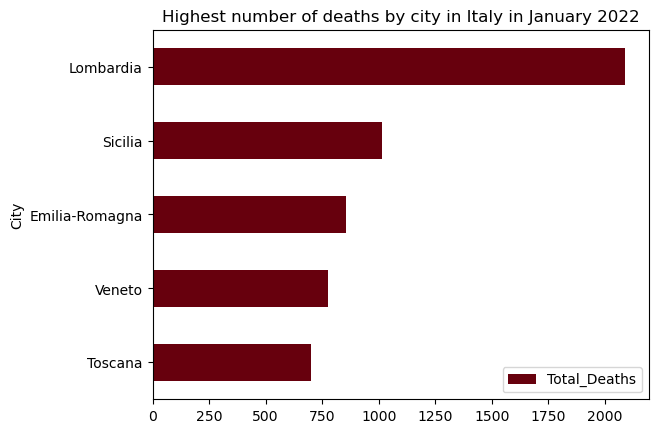

In [20]:
df5.sort_values(by='Total_Deaths', ascending=True).plot(kind='barh', x='City', xlabel='City', ylabel='Jumlah Kematian', title='Highest number of deaths by city in Italy in January 2022', colormap='Reds_r', legend=True);

In the end we can know that Lombaridia is the city in Italy with the highest number of deaths in January 2022.

vi. The Verdict

So we create a rundown as long as we work on this notebook. First we take the original data from Google Cloud Platform, then we clean the data that we don't use using python and pandas functions. Then we process the data using a query to find the highest mortality rate in a city in Italy.

Based on the data plot above, we will make a conclusion as the problem we are looking for:
    
1. We can know that the city of Lombard is the city with the highest death rate in Italy in January 2022.
    
2. The death rate in Lombardia is 2x that in Sicilia.

3. The death rate in the Lombard city of Italy reached 2089 people.

Thank you for your attention.